<center>
<img src="https://habrastorage.org/web/677/8e1/337/6778e1337c3d4b159d7e99df94227cb2.jpg"/>
## Специализация "Машинное обучение и анализ данных"
<center>Автор материала: программист-исследователь Mail.Ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ [Юрий Кашницкий](https://yorko.github.io/)

# <center> Capstone проект №1 <br>Идентификация пользователей по посещенным веб-страницам
<img src='http://i.istockimg.com/file_thumbview_approve/21546327/5/stock-illustration-21546327-identification-de-l-utilisateur.jpg'>

# <center>Неделя 2. Подготовка и первичный анализ данных

На второй неделе мы продолжим подготавливать данные для дальнейшего анализа и построения прогнозных моделей. Конкретно, раньше мы определили что сессия – это последовательность из 10 посещенных пользователем сайтов, теперь сделаем длину сессии параметром, и потом при обучении прогнозных моделей выберем лучшую длину сессии.
Также мы познакомимся с предобработанными данными и статистически проверим первые гипотезы, связанные с нашими наблюдениями. 

**План 2 недели:**
 - Часть 1. Подготовка нескольких обучающих выборок для сравнения
 - Часть 2. Первичный анализ данных, проверка гипотез

**В этой части проекта Вам могут быть полезны  следующие видеозаписи лекций курса "Построение выводов по данным":**

   - [Доверительные интервалы для доли](https://www.coursera.org/learn/stats-for-data-analysis/lecture/3oi53/dovieritiel-nyie-intiervaly-dlia-doli)
   - [Биномиальный критерий для доли](https://www.coursera.org/learn/stats-for-data-analysis/lecture/JwmBw/binomial-nyi-kritierii-dlia-doli)
   - [Доверительные интервалы на основе бутстрепа](https://www.coursera.org/learn/stats-for-data-analysis/lecture/GZjW7/dovieritiel-nyie-intiervaly-na-osnovie-butstriepa)
   
**Кроме того, в задании будут использоваться библиотеки Python [glob](https://docs.python.org/3/library/glob.html), [pickle](https://docs.python.org/2/library/pickle.html), [itertools](https://docs.python.org/3/library/itertools.html) и класс [csr_matrix](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html) из scipy.sparse.**

### Задание
1. Заполните код в этой тетрадке 
2. Если вы проходите специализацию Яндеса и МФТИ, пошлите файл с ответами в соответствующем Programming Assignment. <br> Если вы проходите курс ODS, выберите ответы в [веб-форме](https://docs.google.com/forms/d/13ZnT7w7foHD0uw0ynTtj7atdiCGvlltF8ThhbJCvLsc).  


## Часть 1. Подготовка нескольких обучающих выборок для сравнения

Пока мы брали последовательности из 10 сайтов, и это было наобум. Давайте сделаем число сайтов в сессии параметром, чтоб в дальнейшем сравнить модели классификации, обученные на разных выборках – с 5, 7, 10 и 15 сайтами в сессии. Более того, пока мы брали по 10 сайтов подряд, без пересечения. Теперь давайте применим идею скользящего окна – сессии будут перекрываться. 

**Пример**: для длины сессии 10 и ширины окна 7 файл из 30 записей породит не 3 сессии, как раньше (1-10, 11-20, 21-30), а 5 (1-10, 8-17, 15-24, 22-30, 29-30). При этом в предпоследней сессии будет один ноль, а в последней – 8 нолей.

Создадим несколько выборок для разных сочетаний параметров длины сессии и ширины окна. Все они представлены в табличке ниже:

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
</style>
<table class="tg">
  <tr>
    <th class="tg-031e">session_length -&gt;<br>window_size <br></th>
    <th class="tg-031e">5</th>
    <th class="tg-031e">7</th>
    <th class="tg-031e">10</th>
    <th class="tg-031e">15</th>
  </tr>
  <tr>
    <td class="tg-031e">5</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
  </tr>
  <tr>
    <td class="tg-031e">7</td>
    <td class="tg-031e"></td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
  </tr>
  <tr>
    <td class="tg-031e">10</td>
    <td class="tg-031e"></td>
    <td class="tg-031e"></td>
    <td class="tg-031e"><font color='green'>v</font></td>
    <td class="tg-031e">v</td>
  </tr>
</table>

Итого должно получиться 18 разреженных матриц – указанные в таблице 9 сочетаний параметров формирования сессий для выборок из 10 и 150 пользователей. При этом 2 выборки мы уже сделали в прошлой части, они соответствуют сочетанию параметров: session_length=10, window_size=10, которые помечены в таблице выше галочкой зеленого цвета (done).

Реализуйте функцию *prepare_sparse_train_set_window*.

Аргументы:
- *path_to_csv_files* – путь к каталогу с csv-файлами
- *site_freq_path* – путь к pickle-файлу с частотным словарем, полученным в 1 части проекта
- *session_length* – длина сессии (параметр)
- *window_size* – ширина окна (параметр) 

Функция должна возвращать 2 объекта:
- разреженную матрицу *X_sparse* (двухмерная Scipy.sparse.csr_matrix), в которой строки соответствуют сессиям из *session_length* сайтов, а *max(site_id)* столбцов – количеству посещений *site_id* в сессии. 
- вектор *y* (Numpy array) "ответов" в виде ID пользователей, которым принадлежат сессии из *X_sparse*

Детали:
- Модифицируйте созданную в 1 части функцию *prepare_train_set*
- Некоторые сессии могут повторяться – оставьте как есть, не удаляйте дубликаты
- Замеряйте время выполнения итераций цикла с помощью *time* из *time*, *tqdm* из *tqdm* или с помощью виджета [log_progress](https://github.com/alexanderkuk/log-progress) ([статья](https://habrahabr.ru/post/276725/) о нем на Хабрахабре)
- 150 файлов из *capstone_websites_data/150users/* должны обрабатываться за несколько секунд (в зависимости от входных параметров). Если дольше – не страшно, но знайте, что функцию можно ускорить. 

In [1]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
from glob import glob
import os
import pickle
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from scipy import stats
from statsmodels.stats.proportion import proportion_confint
%matplotlib inline
from matplotlib import pyplot as plt
from collections import Counter

In [2]:
# Поменяйте на свой путь к данным
PATH_TO_DATA = 'C:/Users/ivelk/Documents/6course'  #'/home/elvira/Documents/Машинка/'

In [12]:
def prepare_sparse_train_set_window(path_to_csv_files, site_freq_path, 
                                    session_length=10, window_size=10):
    if window_size > session_length:
        ValueError()
    else:
        file_list = sorted(glob(os.path.join(path_to_csv_files,'*.csv')))
        with open(site_freq_path, 'rb') as f:
            site_freq_dict = pickle.load(f)

        columns = []
        for i in range(session_length):
            columns.append('site' + str(i + 1))
        columns.append('user_id')

        file_data = {}
        user_data = {}
        for user_id, file_name in enumerate(file_list):
            data = pd.read_csv(file_name)
            site_id = np.array([site_freq_dict[site][0] for site in data.site])
            if window_size:
                axis0 = whole = len(site_id) // window_size
                rest = len(site_id) % window_size
                if rest:
                    axis0 += 1
                file_data[user_id] = np.zeros((axis0, session_length), dtype=np.int64)
                for i, shift in enumerate(range(0, len(site_id), window_size)):
                    if shift + session_length <= len(site_id):
                        file_data[user_id][i] = site_id[shift:(shift + session_length)]
                    else:
                        file_data[user_id][i][:(len(site_id)-shift)] = site_id[shift:]
            else:        
                axis0 = whole = len(site_id) // session_length
                rest = len(site_id) % session_length
                if rest:
                    axis0 += 1
                file_data[user_id] = np.zeros((axis0, session_length), dtype=np.int64)
                file_data[user_id][:whole][:] = site_id[:whole * session_length].reshape((whole, session_length))
                if rest:
                    file_data[user_id][whole][:rest] = site_id[whole * session_length:]
            user_data[user_id] = np.array([user_id + 1] * axis0)[:, np.newaxis]
        file_len = len(file_list) - 1
        for i in range(file_len):
            file_data[i + 1] = np.vstack((file_data[i], file_data[i + 1]))
            user_data[i + 1] = np.vstack((user_data[i], user_data[i + 1]))
        matrix_data = file_data[file_len]
        y = user_data[file_len].transpose()[0]

        indptr = [0]
        indices = []
        data = []
        vocabulary = {}
        i_range = 0
        for row_data_curr in matrix_data:
            row_data = Counter(row_data_curr)
            keys = list(row_data.keys())
            values = list(row_data.values())
            for i in range(len(row_data)):
                indices.append(keys[i])
                data.append(values[i])
            indptr.append(i_range + len(row_data))
            i_range +=len(row_data)

        return csr_matrix((data, indices, indptr), dtype=int)[:, 1:], y

**Примените полученную функцию с параметрами *session_length=5* и *window_size=3* к игрушечному примеру. Убедитесь, что все работает как надо.**

In [39]:
X_toy_s5_w3, y_s5_w3 = prepare_sparse_train_set_window(os.path.join(PATH_TO_DATA,'3users'), 
                                                       os.path.join(PATH_TO_DATA,'site_freq_3users.pkl'),
                                       session_length=6, window_size=2)

In [40]:
X_toy_s5_w3.todense()

matrix([[1, 3, 0, 1, 0, 0, 0, 0, 0, 0, 1],
        [1, 2, 0, 0, 0, 1, 0, 0, 0, 1, 1],
        [1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0],
        [1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0],
        [3, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0],
        [3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 2, 0, 1, 2, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [3, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [3, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0],
        [2, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0],
        [1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0],
        [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)

In [8]:
X_toy_s5_w3.todense()

matrix([[0, 3, 1, 0, 0, 0, 1, 0, 0, 0, 0],
        [1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0],
        [0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0],
        [3, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
        [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [3, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1],
        [1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [6]:
y_s5_w3

array([1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3])

In [9]:
y_s5_w3

array([1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3])

**Запустите созданную функцию 16 раз с помощью циклов по числу пользователей num_users (10 или 150), значениям параметра *session_length* (15, 10, 7 или 5) и значениям параметра *window_size* (10, 7 или 5). Сериализуйте все 16 разреженных матриц (обучающие выборки) и векторов (метки целевого класса – ID пользователя) в файлы `X_sparse_{num_users}users_s{session_length}_w{window_size}.pkl` и `y_{num_users}users_s{session_length}_w{window_size}.pkl`.**

**Чтоб убедиться, что мы все далее будем работать с идентичными объектами, запишите в список *data_lengths* число строк во всех полученных рареженных матрицах (16 значений). Если какие-то будут совпадать, это нормально (можно сообразить, почему).**

**На моем ноутбуке этот участок кода отработал за 26 секунд, хотя понятно, что все зависит от эффективности реализации функции *prepare_sparse_train_set_window* и мощности используемого железа. И честно говоря, моя первая реализация была намного менее эффективной (34 минуты), так что тут у Вас есть возможность оптимизировать свой код.**

In [31]:
for num_users in [10, 150]:
    for window_size, session_length in itertools.product([10, 7, 5], [15, 10, 7, 5]):
        if window_size <= session_length and (window_size, session_length) != (10, 10):
            print((window_size, session_length))

(10, 15)
(7, 15)
(7, 10)
(7, 7)
(5, 15)
(5, 10)
(5, 7)
(5, 5)
(10, 15)
(7, 15)
(7, 10)
(7, 7)
(5, 15)
(5, 10)
(5, 7)
(5, 5)


In [41]:
%%time
import itertools

data_lengths = []

for num_users in [10, 150]:
    for window_size, session_length in itertools.product([10, 7, 5], [15, 10, 7, 5]):
        if window_size <= session_length and (window_size, session_length) != (10, 10):
            X_sparse, y = prepare_sparse_train_set_window(os.path.join(PATH_TO_DATA, str(num_users) + 'users'), 
                                                             os.path.join(PATH_TO_DATA,'site_freq_' + str(num_users) + 'users.pkl'),
                                                             session_length=session_length, window_size=window_size)
            with open(os.path.join(PATH_TO_DATA, 'X_sparse_' + str(num_users) + 'users_s' + str(session_length) + '_w' + str(window_size) + '.pkl'), 'wb') as X_pkl:
                pickle.dump(X_sparse, X_pkl, protocol=2)
            with open(os.path.join(PATH_TO_DATA, 'y_' + str(num_users) + 'users_s' + str(session_length) + '_w' + str(window_size) + '.pkl'), 'wb') as y_pkl:
                pickle.dump(y, y_pkl, protocol=2)
            data_lengths.append(X_sparse.shape[0])

Wall time: 1min 8s


In [42]:
data_lengths

[14061,
 20087,
 20087,
 20087,
 28118,
 28118,
 28118,
 28118,
 137019,
 195712,
 195712,
 195712,
 273957,
 273957,
 273957,
 273957]

In [ ]:
%%time
import itertools

data_lengths = []

for num_users in [10, 150]:
    for window_size, session_length in itertools.product([10, 7, 5], [15, 10, 7, 5]):
        if window_size <= session_length and (window_size, session_length) != (10, 10):
            X_sparse, y = ''' ВАШ КОД ЗДЕСЬ '''

**<font color='red'> Вопрос 1. </font>Сколько всего уникальных значений в списке `data_lengths`?**

In [44]:
''' ВАШ КОД ЗДЕСЬ '''
f = open('2_1.txt', 'w')
f.write(str(data_lengths[0]))
for i in range(1, len(data_lengths)):
    f.write(' ' + str(data_lengths[i]))
f.close()
len(set(data_lengths))

6

## Часть 2. Первичный анализ данных, проверка гипотез

**Считаем в DataFrame подготовленный на 1 неделе файл `train_data_10users.csv`. Далее будем работать с ним.**

In [48]:
train_df = pd.read_csv(os.path.join(PATH_TO_DATA, 'train_data_10users.csv'), 
                       index_col='session_id')

In [95]:
train_df.columns[:-1]

Index(['site1', 'site2', 'site3', 'site4', 'site5', 'site6', 'site7', 'site8',
       'site9', 'site10'],
      dtype='object')

In [97]:
train_df_new = train_df.drop_duplicates(subset=train_df.columns[:], keep="last")
train_df_new.shape

(13265, 11)

In [248]:
site_freq_dict = {}
for r in np.array(train_df[train_df.columns[:-1]]):
    for site_string in r:
        if site_string in site_freq_dict:
            site_freq_dict[site_string] += 1 #(site_freq_dict[site_string][0], site_freq_dict[site_string][1] + 1)
        else: 
            site_freq_dict[site_string] = 1
del site_freq_dict[0]

In [249]:
len(site_freq_dict)

4913

In [250]:
train_df.head()

,site1,site2,site3,site4,site5,site6,site7,site8,site9,site10,user_id
session_id,,,,,,,,,,,
1,193,587,134,3,134,134,3,134,204,134,1
2,425,192,706,257,134,31,401,4913,221,55,1
3,55,3,55,55,5,295,425,341,936,55,1
4,486,4912,486,55,55,55,55,1006,202,124,1
5,349,55,5,4911,261,212,4910,2574,705,2574,1


In [50]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14061 entries, 1 to 14061
Data columns (total 11 columns):
site1      14061 non-null int64
site2      14061 non-null int64
site3      14061 non-null int64
site4      14061 non-null int64
site5      14061 non-null int64
site6      14061 non-null int64
site7      14061 non-null int64
site8      14061 non-null int64
site9      14061 non-null int64
site10     14061 non-null int64
user_id    14061 non-null int64
dtypes: int64(11)
memory usage: 1.3 MB


In [11]:
train_df.head()

,site1,site2,site3,site4,site5,site6,site7,site8,site9,site10,user_id
session_id,,,,,,,,,,,
0,193,574,133,3,133,133,3,133,203,133,31
1,415,192,675,254,133,31,393,3634,217,55,31
2,55,3,55,55,5,293,415,333,900,55,31
3,473,3395,473,55,55,55,55,944,199,123,31
4,342,55,5,3458,258,211,3369,2096,674,2096,31


In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14061 entries, 0 to 14060
Data columns (total 11 columns):
site1      14061 non-null int64
site2      14061 non-null int64
site3      14061 non-null int64
site4      14061 non-null int64
site5      14061 non-null int64
site6      14061 non-null int64
site7      14061 non-null int64
site8      14061 non-null int64
site9      14061 non-null int64
site10     14061 non-null int64
user_id    14061 non-null int64
dtypes: int64(11)
memory usage: 1.3 MB


**Распределение целевого класса:**

In [51]:
train_df['user_id'].value_counts()

7     2796
3     2204
8     1868
6     1712
9     1643
2     1022
4      802
1      760
5      720
10     534
Name: user_id, dtype: int64

In [13]:
train_df['user_id'].value_counts()

128    2796
39     2204
207    1868
127    1712
237    1643
33     1022
50      802
31      760
100     720
241     534
Name: user_id, dtype: int64

**Посчитаем распределение числа уникальных сайтов в каждой сессии из 10 посещенных подряд сайтов.**

In [64]:
num_unique_sites = [np.unique(train_df.values[i, :-1]).shape[0] 
                    for i in range(train_df.shape[0])]
num_unique_sites

[5,
 10,
 7,
 6,
 9,
 8,
 7,
 8,
 8,
 7,
 7,
 8,
 9,
 8,
 8,
 5,
 6,
 4,
 6,
 5,
 7,
 7,
 6,
 6,
 6,
 4,
 6,
 6,
 7,
 9,
 7,
 5,
 8,
 5,
 5,
 6,
 6,
 6,
 8,
 7,
 7,
 7,
 8,
 6,
 6,
 6,
 9,
 6,
 6,
 6,
 8,
 7,
 7,
 8,
 10,
 5,
 8,
 9,
 10,
 4,
 10,
 6,
 9,
 7,
 7,
 7,
 7,
 9,
 8,
 8,
 7,
 7,
 6,
 4,
 7,
 8,
 6,
 7,
 5,
 7,
 7,
 7,
 9,
 6,
 7,
 10,
 6,
 6,
 7,
 7,
 9,
 8,
 6,
 9,
 5,
 4,
 3,
 2,
 5,
 8,
 9,
 9,
 5,
 5,
 5,
 9,
 5,
 7,
 3,
 1,
 2,
 4,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 5,
 8,
 7,
 9,
 8,
 2,
 5,
 8,
 5,
 6,
 4,
 1,
 2,
 1,
 1,
 6,
 9,
 7,
 5,
 7,
 5,
 8,
 8,
 7,
 8,
 9,
 7,
 8,
 8,
 9,
 7,
 6,
 7,
 4,
 4,
 3,
 7,
 5,
 7,
 9,
 9,
 6,
 9,
 8,
 10,
 9,
 9,
 8,
 8,
 7,
 8,
 9,
 7,
 9,
 7,
 10,
 9,
 10,
 7,
 7,
 7,
 9,
 7,
 5,
 7,
 5,
 7,
 5,
 8,
 7,
 9,
 9,
 8,
 10,
 7,
 9,
 9,
 8,
 7,
 9,
 8,
 7,
 8,
 10,
 10,
 8,
 4,
 7,
 6,
 6,
 6,
 9,
 9,
 7,
 10,
 7,
 10,
 8,
 7,
 9,
 8,
 9,
 10,
 6,
 9,
 9,
 8,
 5,
 3,
 7,
 7,
 8,
 7,
 8,
 7,
 6,
 7,
 8,
 8,
 7,
 8,
 7,
 7,
 10,
 7,
 7,
 8,
 

In [53]:
pd.Series(num_unique_sites).value_counts()

7     2308
6     2197
8     2046
5     1735
9     1394
2     1246
4     1163
3      894
10     651
1      427
dtype: int64

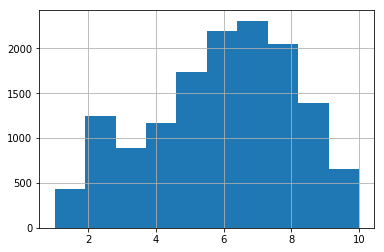

In [54]:
pd.Series(num_unique_sites).hist();

**Проверьте с помощью QQ-плота и критерия Шапиро-Уилка, что эта величина распределена нормально**

**<font color='red'> Вопрос 2. </font>Распределено ли нормально число уникальных сайтов в каждой сессии из 10 посещенных подряд сайтов (согласно критерию Шапиро-Уилка)?**

In [57]:
''' ВАШ КОД ЗДЕСЬ '''
from statsmodels.stats.weightstats import *
%pylab inline

Populating the interactive namespace from numpy and matplotlib


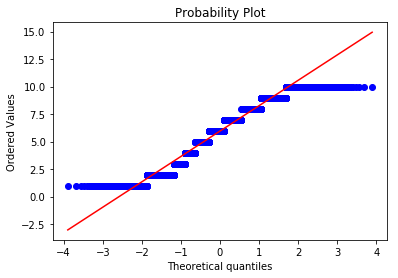

In [59]:
pylab.figure()
pylab.subplot(1,1,1)
stats.probplot(num_unique_sites, dist="norm", plot=pylab)
pylab.show()

In [61]:
print ("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % stats.shapiro(num_unique_sites))

Shapiro-Wilk normality test, W-statistic: 0.954693, p-value: 0.000000


**Проверьте гипотезу о том, что пользователь хотя бы раз зайдет на сайт, который он уже ранее посетил в сессии из 10 сайтов. Давайте проверим с помощью биномиального критерия для доли, что доля случаев, когда пользователь повторно посетил какой-то сайт (то есть число уникальных сайтов в сессии < 10) велика: больше 95% (обратите внимание, что альтернатива тому, что доля равна 95% –  одностороняя). Ответом на 3 вопрос в тесте будет полученное p-value.**

**<font color='red'> Вопрос 3. </font>Каково p-value при проверке описанной гипотезы?**

In [66]:
has_two_similar = (np.array(num_unique_sites) < 10).astype('int')
sum(has_two_similar)

13410

In [81]:
pi_val = stats.binom_test(sum(has_two_similar), len(has_two_similar), 0.95, alternative = 'greater') 
pi_val

0.02207653769072678

In [82]:
f = open('2_3.txt', 'w')
f.write(str(pi_val))
f.close()

**<font color='red'> Вопрос 4. </font>Каков 95% доверительный интервал Уилсона для доли случаев, когда пользователь повторно посетил какой-то сайт (из п. 3)?**

In [83]:
wilson_interval = proportion_confint(sum(has_two_similar), len(has_two_similar), method = 'wilson')

In [84]:
print('{} {}'.format(round(wilson_interval[0], 3),
                                   round(wilson_interval[1], 3)))

0.95 0.957


In [86]:
f = open('2_4.txt', 'w')
f.write(str(round(wilson_interval[0], 3)))
f.write(' ')
f.write(str(round(wilson_interval[1], 3)))
f.close()

**Постройте распределение частоты посещения сайтов (сколько раз тот или иной сайт попадается в выборке) для сайтов, которые были посещены как минимум 1000 раз.**

In [87]:
with open('site_freq_10users.pkl', 'rb') as f:
            site_freq_dict = pickle.load(f)
site_freq_dict

{'fpdownload2.macromedia.com': (193, 88),
 'laposte.net': (587, 23),
 'www.laposte.net': (134, 119),
 'www.google.com': (3, 5441),
 'match.rtbidder.net': (204, 84),
 'x2.vindicosuite.com': (425, 37),
 'rp.gwallet.com': (192, 88),
 'pool-eu-ie.creative-serving.com': (706, 18),
 'dl.javafx.com': (257, 65),
 'ajax.googleapis.com': (31, 711),
 'api.dailymotion.com': (401, 40),
 'i1-js-14-3-01-11074-266576264-i.init.cedexis-radar.net': (4913, 1),
 'limelight.cedexis.com': (221, 78),
 'webmail.laposte.net': (55, 399),
 'www.facebook.com': (5, 4141),
 'rubicon-match.dotomi.com': (295, 55),
 'pr.ybp.yahoo.com': (341, 47),
 'dtm.ccs.com': (936, 12),
 'b12.myspace.com': (486, 31),
 'i1-js-14-3-01-11074-845302217-i.init.cedexis-radar.net': (4912, 1),
 'trk.adbutter.net': (1006, 11),
 'rs.mediapostcommunication.net': (202, 85),
 'av.mediapostcommunication.net': (124, 133),
 'rbp.mxptint.net': (349, 46),
 'i1-js-14-3-01-11074-25651477-i.init.cedexis-radar.net': (4911, 1),
 'level3.cedexis.com': (26

In [251]:
len(site_freq_dict)

4913

In [28]:
site_freqs = 

In [ ]:
''' ВАШ КОД ЗДЕСЬ '''

**Постройте 95% доверительный интервал для средней частоты появления сайта в выборке (во всей, уже не только для тех сайтов, что были посещены как минимум 1000 раз) на основе bootstrap. Используйте столько же bootstrap-подвыборок, сколько сайтов оказалось в исходной выборке по 10 пользователям. Берите подвыборки из посчитанного списка частот посещений сайтов – не надо заново считать эти частоты. Учтите, что частоту появления нуля (сайт с индексом 0 появлялся там, где сессии были короче 10 сайтов) включать не надо. Округлите границы интервала до 3 знаков после запятой и запишите через пробел в файл *answer2_5.txt*. Это будет ответом на 5 вопрос теста.**

**<font color='red'> Вопрос 5. </font>Каков 95% доверительный интервал для средней частоты появления сайта в выборке?**

In [290]:
def get_bootstrap_samples(data, n_samples, random_seed=17):
    np.random.seed(random_seed)
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples= data[indices]
    return samples

In [291]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, 
                 [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [292]:
# sorted(site_freq_dict.values(), reverse = True)
data = get_bootstrap_samples(np.array(sorted(list(site_freq_dict.values()), reverse = True)), len(site_freq_dict))

In [293]:
type(sorted(list(site_freq_dict.values()), reverse = True))

list

In [294]:
sum(data[0]) / len(data[0])

27.891105231019743

In [295]:
median_scores = [np.mean(d) for d in data]
print ("95% confidence interval for the ILEC median repair time:",  stat_intervals(median_scores, 0.05))

95% confidence interval for the ILEC median repair time: [22.51524527 35.76303684]


In [296]:
interval = stat_intervals(median_scores, 0.05)
f = open('2_5.txt', 'w')
f.write(str(round(interval[0], 3)))
f.write(' ')
f.write(str(round(interval[1], 3)))
f.close()

## Пути улучшения
Что еще можно добавить по второй части проекта:
- можно дополнительно рассматривать сессии с параметром – длиной сессии по времени. И составить выборки, скажем, для 5-, 10-, 15- и 20-минутных сессий (это как раз пригодится в [соревновании](https://inclass.kaggle.com/c/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking2) Kaggle Inclass)
- можно провести больше первичного анализа и проверять прочие интересные гипотезы (а больше их появится после создания признаков на следующей неделе)

На 3 неделе мы займемся визуальным анализом данных и построением признаков.